# Laboratorio 6 - Algoritmo de diamond-square

In [1]:
'''
El algoritmo de diamante-cuadrado es un algoritmo de generación de terrenos.
El algoritmo se utiliza para generar terrenos realistas a partir de una matriz
basados en la idea de la interpolacion de valores de la matriz.

- Generacion de puntos iniciales
Los cuatros puntos en las esquinas de la matriz se inicializan con valores
aleatorios. Estos puntos representas las alturas iniciales del terreno en las esquinas del terreno.

- Iteraciones de diamante y cuadrado:
El algoritmo funciona mediante iteraciones de dos pasos, conocidos como "diamante" y "cuadrado".
Estos pasos se realizan alternativamente hasta que se establece todos los valores de la matriz.
El algoritmo busca generar terrenos con trasiciones suaves entre alturas, lo que crea una apariencia
mas "natural". Los pasos de diamante y cuadrado permiten estimar/interpolar los valores de las alturas
en los puntos intermedios entre las esquinas de los cuadrados y diamantes.
Ademas, este algoritmo es un ejemplo de un fractal, que es una estructura geometrica que se repite a 
diferentes escalas. La rugosidad y la variacion del terreno se logran al reducir la magnitud del valor aleatorio
con cada iteracion. Los pasos de diamante y cuadrado permiten que el fractal se derrolle en multiples niveles
de detalle, creado una apariencia fractal en el terreno.
'''

'\nEl algoritmo de diamante-cuadrado es un algoritmo de generación de terrenos.\nEl algoritmo se utiliza para generar terrenos realistas a partir de una matriz\nbasados en la idea de la interpolacion de valores de la matriz.\n\n- Generacion de puntos iniciales\nLos cuatros puntos en las esquinas de la matriz se inicializan con valores\naleatorios. Estos puntos representas las alturas iniciales del terreno en las esquinas del terreno.\n\n- Iteraciones de diamante y cuadrado:\nEl algoritmo funciona mediante iteraciones de dos pasos, conocidos como "diamante" y "cuadrado".\nEstos pasos se realizan alternativamente hasta que se establece todos los valores de la matriz.\nEl algoritmo busca generar terrenos con trasiciones suaves entre alturas, lo que crea una apariencia\nmas "natural". Los pasos de diamante y cuadrado permiten estimar/interpolar los valores de las alturas\nen los puntos intermedios entre las esquinas de los cuadrados y diamantes.\nAdemas, este algoritmo es un ejemplo de un 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Algoritmo diamante cuadrado
def diamond_square(size, roughness):
    n = size - 1 # Valor maximo de la matriz terrain
    terrain = np.zeros((size, size), dtype=float)

    # Valores iniciales de las cuatro esquinas de la matriz con valores aleatorios entre 0 y 1
    terrain[0, 0] = np.random.uniform(0, 1)
    terrain[0, n] = np.random.uniform(0, 1)
    terrain[n, 0] = np.random.uniform(0, 1)
    terrain[n, n] = np.random.uniform(0, 1)

    step = n # Tamaño inicial del paso
    scale = 1.0 # Control de la magnitud de la perturbacion aleatoria

    # Bucle mientras el paso sea mayor que 1
    while step > 1:
        half = step // 2

        # Recorren los cuadrados de la matriz en cada iteracion y calculan el valor promedio
        # de los cuatro puntos de las esquinas del terreno.
        # NOTA: Esto simula la interpolacion de alturas en los centros de los diamantes
        for y in range(half, n, step):
            for x in range(half, n, step):
                avg = (terrain[y - half, x - half] + terrain[y - half, x + half] +
                       terrain[y + half, x - half] + terrain[y + half, x + half]) / 4
                terrain[y, x] = avg + np.random.uniform(-scale, scale) # Punto medio del cuadrado

        # Recorren los diamantes de la matriz en cada iteracion y calculan el valor promedio
        # NOTA: Esto simula la interpolacion de alturas en los centros de los cuadrados
        for y in range(0, n + 1, step):
            for x in range(half, n, step):
                avg = (terrain[y, x - half] + terrain[y, x + half]) / 2
                terrain[y, x] = avg + np.random.uniform(-scale, scale) # Punto medio del diamante

        # Se reduce el paso y la magnitud de la rugosidad para la siguiente iteracion
        step = half
        scale *= roughness

    return terrain

In [25]:
size = 9  # Tamaño de la matriz (debe ser 2^n + 1)
roughness = 0.5 # Rugosidad del terreno

terrain = diamond_square(size, roughness)

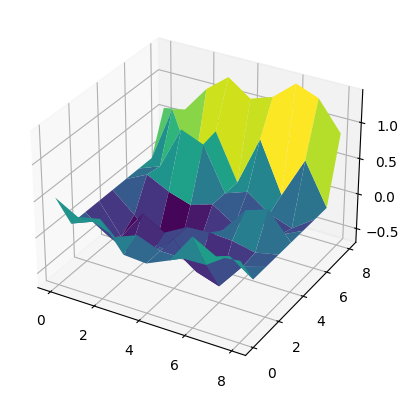

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(size)
y = np.arange(size)
x, y = np.meshgrid(x, y)

ax.plot_surface(x, y, terrain, cmap='viridis')

plt.show()